In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from src.path_loss import PathLossInHIndoorOffice, PathLossInHShoppingMalls

from src.network_sim import NetworkSimulator

from src.algorithm import weighted_minimum_mean_square_error


%reload_ext autoreload
%autoreload 2
%aimport src

In [2]:
frequency_Hz= 50 * 1e9 # Hz
distance_m = 50
sample_size = 10

In [3]:
pd.DataFrame({
    'PathLossInHIndoorOffice':[PathLossInHIndoorOffice().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMalls': [PathLossInHShoppingMalls().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
})

,PathLossInHIndoorOffice,PathLossInHShoppingMalls
0,-112.772957,-98.548980
1,-118.301760,-109.886204
2,-132.653355,-106.489039
3,-121.169680,-102.471876
4,-135.580905,-94.089869
5,-116.983048,-93.675827
6,-121.841991,-102.468280
7,-139.698003,-120.477607
8,-136.520968,-107.222331
9,-99.984742,-116.563339


In [43]:
simulator = NetworkSimulator(Tx_radius=100, Rx_radius=25, num_Tx_known=5, num_Rx_per_Tx_known=10, num_Tx_unknown=5, num_Rx_per_Tx_unknown=5)

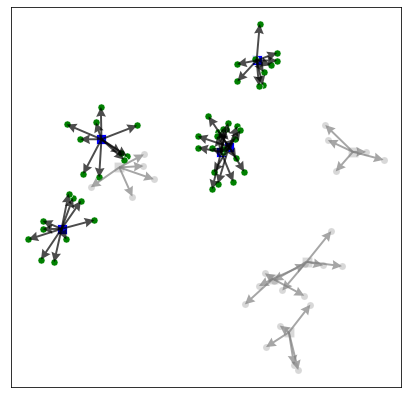

In [44]:
simulator.plot_network()

In [45]:
pd.DataFrame(simulator.gain_mat_dBm)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-91.563637,-88.370972,-102.599731,-84.891992,-113.587870,-96.320511,-84.720638,-90.259614,-87.902073,-91.837869,...,-138.812153,-132.579527,-136.128103,-132.894520,-134.280426,-127.662827,-128.172137,-128.837254,-134.239928,-129.655122
1,-110.823670,-111.797219,-105.131127,-103.216943,-115.283573,-110.451677,-108.637789,-118.416045,-112.052021,-110.804831,...,-130.334203,-136.318055,-131.287172,-137.584221,-129.589811,-124.290570,-134.732949,-128.941178,-125.161820,-129.655775
2,-131.153742,-128.874004,-117.276849,-126.797054,-108.852747,-114.445020,-130.192533,-126.589638,-113.367306,-133.780914,...,-108.788126,-120.468566,-128.952563,-118.727718,-123.908333,-122.877506,-109.702246,-122.378993,-105.502521,-104.913349
3,-123.638117,-120.070140,-119.705538,-113.814064,-115.315935,-122.596607,-125.297459,-128.909444,-114.281881,-124.563427,...,-115.215075,-125.699408,-114.721061,-114.802008,-126.903345,-108.249891,-117.162729,-117.243455,-107.059423,-128.624151
4,-130.555925,-115.796363,-126.815469,-138.782066,-129.654964,-128.686614,-138.279099,-145.171708,-130.770808,-143.352740,...,-122.411504,-116.252335,-124.755519,-125.893999,-131.207895,-124.909281,-128.323966,-130.974072,-129.570913,-134.803980
5,-146.409899,-134.875197,-154.436334,-138.397228,-143.569826,-145.481185,-134.158151,-141.902732,-133.499643,-143.198950,...,-108.862154,-111.610732,-96.655760,-106.659054,-111.766198,-116.510041,-121.253543,-103.906595,-119.112259,-108.961901
6,-121.167831,-116.145496,-103.754295,-106.153394,-106.090208,-102.916740,-103.228578,-112.875369,-93.952209,-121.814140,...,-125.977174,-127.148577,-134.470235,-135.891687,-126.172625,-113.695819,-114.892621,-139.148601,-116.341533,-132.914941
7,-134.150511,-137.265972,-137.283648,-148.541659,-130.676981,-129.221633,-123.464917,-130.233862,-133.464530,-127.416484,...,-115.582695,-100.143536,-109.841355,-97.571152,-113.174507,-95.089829,-110.459209,-89.127121,-113.751140,-105.017611
8,-142.766507,-135.568351,-135.913798,-143.653414,-140.742021,-118.797558,-120.900945,-135.356247,-135.828966,-128.371515,...,-104.074016,-93.880122,-103.151712,-95.099653,-98.318204,-108.885017,-103.452382,-96.393326,-90.438889,-74.618034
9,-124.673716,-124.377223,-136.562433,-137.459187,-122.625686,-125.720826,-129.312688,-134.420282,-123.348385,-124.531669,...,-105.361668,-69.092449,-103.637200,-98.959228,-99.034602,-107.858467,-96.375938,-89.003678,-80.075352,-106.941780


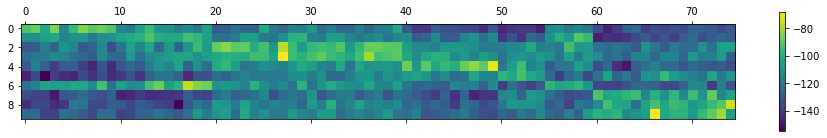

In [46]:
simulator.plot_gain_mat()

In [47]:
simulator.weighted_sum_rate_Gbps(Rx_powers_mW=[250 for i in range(len(simulator.x_Rx))], Rx_weights=np.ones(len(simulator.x_Rx)))

244.69244306594416

In [49]:
part = 'full'
gain_mat_mW = simulator.get_gain_mat(part=part, unit='mW')

if part == 'unknown':
    Tx_idx_shift = len(simulator.x_Tx) - gain_mat_mW.shape[0]
    Rx_idx_shift = len(simulator.x_Rx) - gain_mat_mW.shape[1]
else:
    Tx_idx_shift = 0
    Rx_idx_shift = 0


powers = weighted_minimum_mean_square_error(
    simulator = simulator, 
    gain_mat_mW = gain_mat_mW,
    Rx_powers_mW = [250 for i in range(len(simulator.x_Rx))],
    Rx_max_powers_mW = [500 for i in range(gain_mat_mW.shape[1])],
    Rx_weights=np.ones(len(simulator.x_Rx)),
    Tx_idx_shift=Tx_idx_shift,
    Rx_idx_shift=Rx_idx_shift,
)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 303.487739410958, 0.0, 0.0, 0.0, 2.0458559969640424e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.413594173026858, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 185.16797056028466, 47.87565698778978, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.03612460529646, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 242.9018842323369, 0.0]
Weighted Sum Rate: 368.41825256038226
Round 5000 0.05725160248536745
	 Power: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 303.487739410958, 0.0, 0.0, 0.0, 2.0458559969640424e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.413594173026858, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 185.16797056028466, 47.87565698778978, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.03612460529646, 0.0, 0.0, 0.0, 0.0, 0.0, 0